# Project 3.  Due October 31

In [2]:
import sys
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy.linalg as LA

### The attached file, 'polluteddata.csv', contains the following data.
### We took intraday price values for an asset; this time series was then split into half-hour intervals for a total of 1709 intervals

In [4]:
data = pd.read_csv('polluteddata.csv',header=None)
polluteddata = data.to_numpy()

In [5]:
data

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,-3.00,-8.26,-10.55,-8.56,-18.08,-12.67,-14.29,-16.08,...,-27.58,-31.51,-27.53,-25.24,-25.32,-24.44,-28.04,-30.94,-29.57,-27.56
1,1.0,0.0,0.12,-0.41,-2.56,0.15,-1.65,-5.14,-5.09,-8.06,...,-6.65,-5.43,-6.13,-3.42,-4.48,-4.85,-4.47,-4.68,-2.10,-0.28
2,2.0,0.0,-2.80,-3.46,-5.80,-3.86,-2.60,-5.30,-4.81,-3.30,...,-12.74,-13.02,-15.99,-14.15,-14.92,-16.80,-16.88,-19.53,-25.30,-19.60
3,3.0,0.0,-1.95,-9.58,-13.68,-13.64,-18.36,-22.33,-15.70,-16.69,...,-19.50,-17.76,-18.52,-20.12,-17.35,-14.18,-15.57,-15.42,-19.58,-17.68
4,4.0,0.0,-1.11,1.62,-0.34,-5.76,-2.53,-0.56,1.45,0.62,...,0.49,-3.04,-0.82,-8.32,-3.87,-10.33,-11.46,-8.94,-16.81,-16.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,1704.0,0.0,0.38,-0.73,-3.09,-2.31,-2.46,-7.22,-5.85,-4.63,...,-23.96,-19.09,-17.55,-23.27,-20.66,-18.36,-18.05,-16.96,-21.37,-25.62
1705,1705.0,0.0,-3.21,-9.32,-2.90,-7.39,-8.25,1.42,1.40,2.22,...,4.42,4.05,1.48,-7.24,-7.92,-15.95,-18.73,-14.73,-12.64,-12.91
1706,1706.0,0.0,-0.83,1.65,2.19,1.62,0.45,0.63,4.18,4.02,...,18.51,18.66,16.63,14.55,16.01,13.66,15.52,15.37,16.70,12.52
1707,1707.0,0.0,0.34,-0.90,-2.51,-2.15,-4.72,-4.57,-7.59,-5.22,...,0.95,3.28,-0.92,0.28,-2.47,-7.22,-9.03,-10.33,-12.30,-16.24


In [6]:
data.shape

(1709, 31)

### There are 1709 lines in this file, one for each half-hour interval.  Each line begins with the count of the corresponding half-hour

In [8]:
for t in range(3): #len(polluteddata[0,:])):
    print('half-hour',t, 'data:',polluteddata[t,:])

half-hour 0 data: [  0.     0.    -3.    -8.26 -10.55  -8.56 -18.08 -12.67 -14.29 -16.08
 -20.04 -15.81 -14.56 -17.34 -20.14 -15.96 -14.3  -15.82 -15.07 -12.39
 -20.65 -27.58 -31.51 -27.53 -25.24 -25.32 -24.44 -28.04 -30.94 -29.57
 -27.56]
half-hour 1 data: [  1.     0.     0.12  -0.41  -2.56   0.15  -1.65  -5.14  -5.09  -8.06
  -9.05 -14.9  -18.27 -16.18 -15.42 -13.8  -12.89 -12.87 -10.18 -12.7
  -9.21  -6.65  -5.43  -6.13  -3.42  -4.48  -4.85  -4.47  -4.68  -2.1
  -0.28]
half-hour 2 data: [  2.     0.    -2.8   -3.46  -5.8   -3.86  -2.6   -5.3   -4.81  -3.3
  -0.28   1.33   0.68   2.3    1.65  -9.32 -11.74 -11.49 -19.37 -11.8
 -10.87 -12.74 -13.02 -15.99 -14.15 -14.92 -16.8  -16.88 -19.53 -25.3
 -19.6 ]


### The data was constructed as follows for each half hour interval $t$.  Suppose that $p(t, k)$ denotes the price of the asset in minute $k$ of half-hour $t$.  Here $k = 0,1,\ldots, 29$.  
### The data in position $k+1$ of line $t$ of the file equals $p(t,k) - p(t,0)$, i.e. the change in price between minute $k$ and minute $0$.

### EXCEPT that:
### The data was <font color = "red">polluted</font> in a <font color = "red">significant and correlated</font> manner during a certain <font color = "red"> interval $[t_1, t_2]$ </font> of half-hours.
### Your task is to identify this interval $[t_1, t_2]$ as closely as possible, using <font color = "red">covariance analysis techniques</font>.
### Please use power method if you want to find the largest eigenvalue and its corresponding eigenvector for certain matrices.
### Please note that we are not interested in small, random noise.  We are looking for a large change in the covariance structure.

In [11]:
def power_method(A, num_iterations=1000):
    """
    Find dominant eigenvalue/vector of matrix A via Power Method.
    Uses LA.norm() as imported in the first cell.
    """
    n_features = A.shape[1]
    
    if n_features == 0:
        return 0, np.zeros(n_features)
        
    # Start with a random vector
    b_k = np.random.rand(n_features)
    
    for _ in range(num_iterations):
        # 1. Matrix-vector multiplication
        b_k1 = np.dot(A, b_k)
        
        # 2. Calculate the norm (using LA.norm)
        b_k1_norm = LA.norm(b_k1)
        
        if b_k1_norm == 0:
            # Avoid division by zero
            b_k = np.random.rand(n_features)
            continue
            
        # 3. Normalize
        b_k = b_k1 / b_k1_norm
    
    # Calculate eigenvalue using the Rayleigh quotient
    eigenvalue = np.dot(b_k.T, np.dot(A, b_k))
    return eigenvalue, b_k

def get_covariance(X_window):
    """
    Calculate the sample covariance matrix for a data window.
    """
    n_samples, n_features = X_window.shape
    
    if n_samples < 2:
        # Not enough samples to calculate covariance
        return np.zeros((n_features, n_features))
        
    # 1. Center the data (subtract the mean)
    X_centered = X_window - X_window.mean(axis=0)
    
    # 2. Calculate covariance: (X_c.T @ X_c) / (n - 1)
    cov_matrix = np.dot(X_centered.T, X_centered) / (n_samples - 1)
    return cov_matrix

In [12]:
# --- Tunable Parameters ---
N_BASELINE = 200      # Number of intervals for the "clean" baseline
WINDOW_SIZE = 100     # Size of the sliding window
STEP_SIZE = 25        # Step size for the sliding window
SIM_THRESHOLD = 0.5   # Similarity threshold to detect change

# --- Prepare Data ---
# 'polluteddata' variable comes from your first cell
# Features are columns 1 through 30 (30 features total)
X = polluteddata[:, 1:]
n_total_intervals, n_features = X.shape
print(f"Data shape for analysis (intervals, features): {X.shape}")

# --- Calculate Baseline ---
# Assume the first N_BASELINE intervals are "clean"
X_base = X[0:N_BASELINE, :]
C_base = get_covariance(X_base)
lambda_base, v_base = power_method(C_base)
print(f"Baseline structure calculated using intervals 0-{N_BASELINE-1}.")

Data shape for analysis (intervals, features): (1709, 30)
Baseline structure calculated using intervals 0-199.


In [13]:
window_starts = []
similarities = []
eigenvalues = []
print(f"Running sliding window (Window={WINDOW_SIZE}, Step={STEP_SIZE})...")

# Iterate through the data
for i in range(0, n_total_intervals - WINDOW_SIZE + 1, STEP_SIZE):
    
    # 1. Get the current window's data
    X_window = X[i : i + WINDOW_SIZE, :]
    
    # 2. Calculate this window's covariance and principal eigenvector
    C_window = get_covariance(X_window)
    lambda_i, v_i = power_method(C_window)
    
    # 3. Compare: Similarity = |v_window · v_base|
    # (Use absolute value, as v and -v represent the same component)
    similarity = np.abs(np.dot(v_i, v_base))
    
    # 4. Store results
    window_starts.append(i)
    similarities.append(similarity)
    eigenvalues.append(lambda_i)

print("Sliding window analysis complete.")

Running sliding window (Window=100, Step=25)...
Sliding window analysis complete.


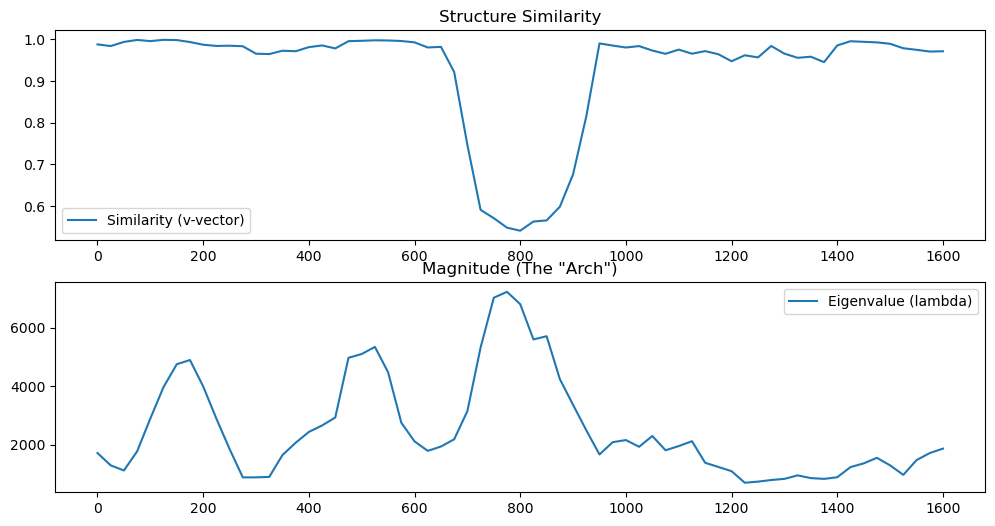

In [27]:

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(window_starts, similarities, label='Similarity (v-vector)')
plt.title('Structure Similarity')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(window_starts, eigenvalues, label='Eigenvalue (lambda)')
plt.title('Magnitude (The "Arch")')
plt.legend()

plt.show()

In [15]:
# Convert lists to numpy arrays for boolean indexing
window_starts_np = np.array(window_starts)
similarities_np = np.array(similarities)

# Find all windows where similarity is below the threshold
polluted_mask = similarities_np < SIM_THRESHOLD

if not np.any(polluted_mask):
    print(f"No polluted interval found with threshold {SIM_THRESHOLD}.")
else:
    # Get the 'start_index' of all windows identified as "polluted"
    polluted_start_indices = window_starts_np[polluted_mask]
    
    # t1 is the start of the *first* polluted window
    t1 = polluted_start_indices[0]
    
    # t2 is the *end* of the *last* polluted window
    # (i.e., the start of the last polluted window + window size - 1)
    t2 = polluted_start_indices[-1] + WINDOW_SIZE - 1
    
    # Ensure t2 does not exceed the total data length
    t2 = min(t2, n_total_intervals - 1)
    
    print("\n" + "="*32)
    print("    Polluted Interval Found    ")
    print(f"   [t1, t2] = [{t1}, {t2}]")
    print("="*32)

No polluted interval found with threshold 0.5.
